
<hr>
<h3 align=center><font size=10>DIABETES PREDICTION</font></h3>
</hr>

In [ ]:

import pandas as pd 
import numpy as np
from scipy import stats
import seaborn as sns 
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
df = pd.read_csv("diabetes.csv",index_col=0)
df_copy = pd.read_csv("diabetes.csv",index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
for col in {'Insulin','BloodPressure','BMI','SkinThickness','Glucose'}:
   print(col+":",df_copy[col].median())

BloodPressure: 72.0
Insulin: 30.5
SkinThickness: 23.0
Glucose: 117.0
BMI: 32.0


<h1>TO COUNT MISSING VALUES</h1>
  <li>
     dataframe.shape returns the dimensions of dataframe 
  <li/>   
  <li>   
     shape[0] returns the rows of the dataframe 
  <li/>     

<p>Certain columns such as <b> 'BloodPressure' , 'Insulin' , 'Glucose' , 'SkinThickness' , 'BMI'</b> can't be zero therefore zero means a null entry or missing value for these columns </p>

In [ ]:

print("Total zero BP : ", df[df.BloodPressure == 0].shape[0])
print("Total zero insulin : ", df[df.Insulin == 0].shape[0])
print("Total zero glucose : ", df[df.Glucose == 0].shape[0])
print("Total zero SkinThickness : ", df[df.SkinThickness == 0].shape[0])
print("Total zero BMI : ", df[df.BMI == 0].shape[0])


Total zero BP :  35
Total zero insulin :  374
Total zero glucose :  5
Total zero SkinThickness :  227
Total zero BMI :  11


<h3 align=center><font size=5>DEALING WITH MISSING VALUES</font></h3>     

In [ ]:

for col in {'Insulin','BloodPressure','BMI','SkinThickness','Glucose'}:
         df_copy[col].replace(0,np.nan,inplace=True)

In [ ]:

df_copy['Glucose'].replace(np.nan,df_copy.Glucose.median(),inplace=True)
print( "Total zero Insulin : ",df_copy[ df_copy['Glucose'].isnull() ] )

for col in {'BloodPressure','SkinThickness','BMI','Insulin'}:
   df_copy[col].replace(np.nan,df_copy[col].median(),inplace=True)

Total zero Insulin :  Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [ ]:
for col in {'BloodPressure','SkinThickness','BMI','Insulin'}:
     print("Total zero "+col+": ",df_copy[ df_copy[col].isnull() ].shape[0])

Total zero BloodPressure:  0
Total zero SkinThickness:  0
Total zero Insulin:  0
Total zero BMI:  0


<h1>CORRELATION BEFORE NAN REMOVAL</h1>

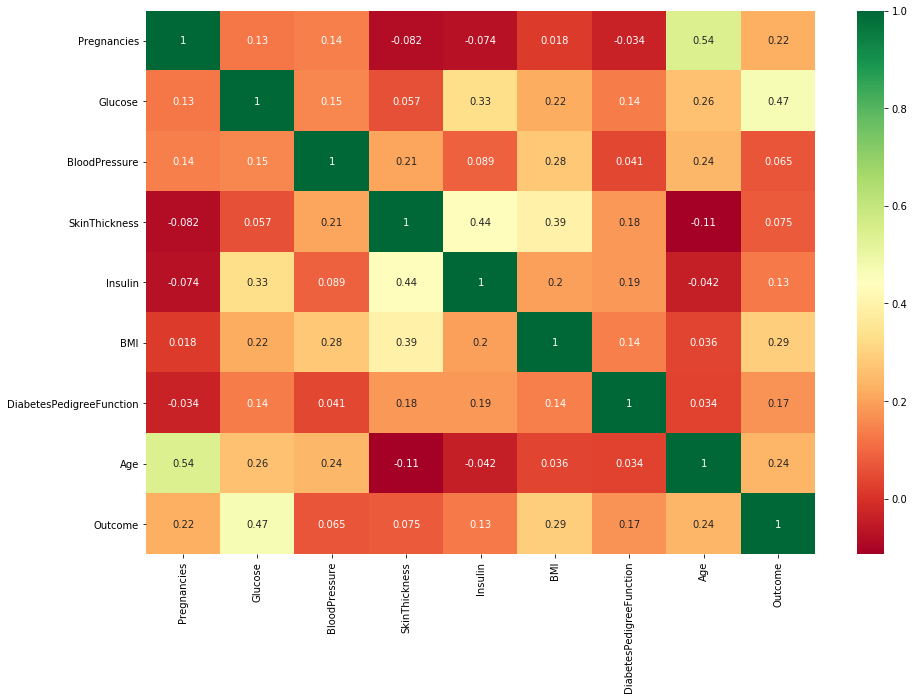

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

<h1>CORRELATION AFTER CLEANING DATA</h1> 

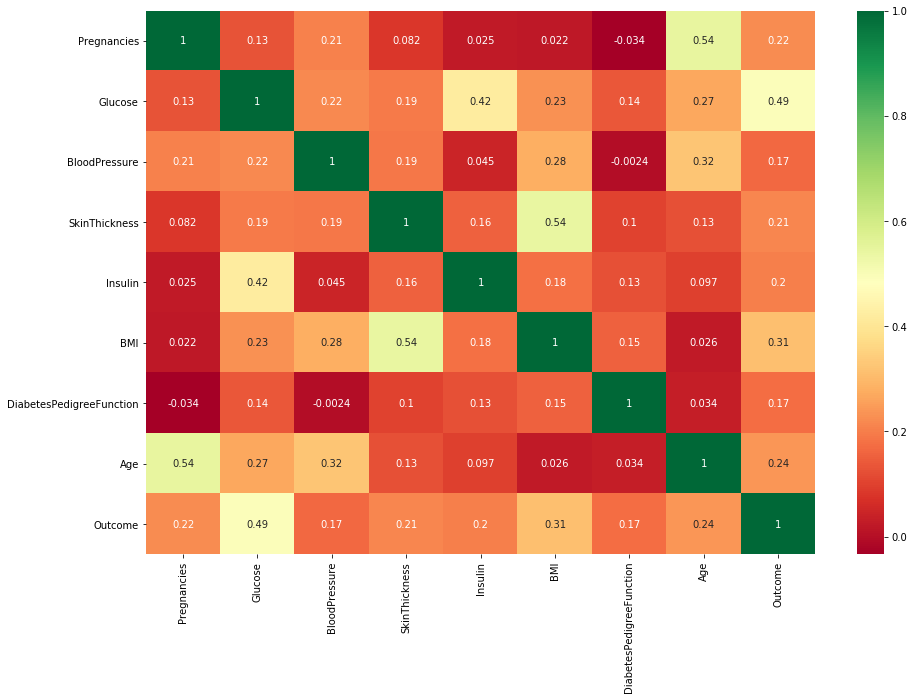

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_copy.corr(), annot=True,cmap ='RdYlGn')

<h1>DATA DISTRIBUTION (UNCLEANED DATA) </h1> 

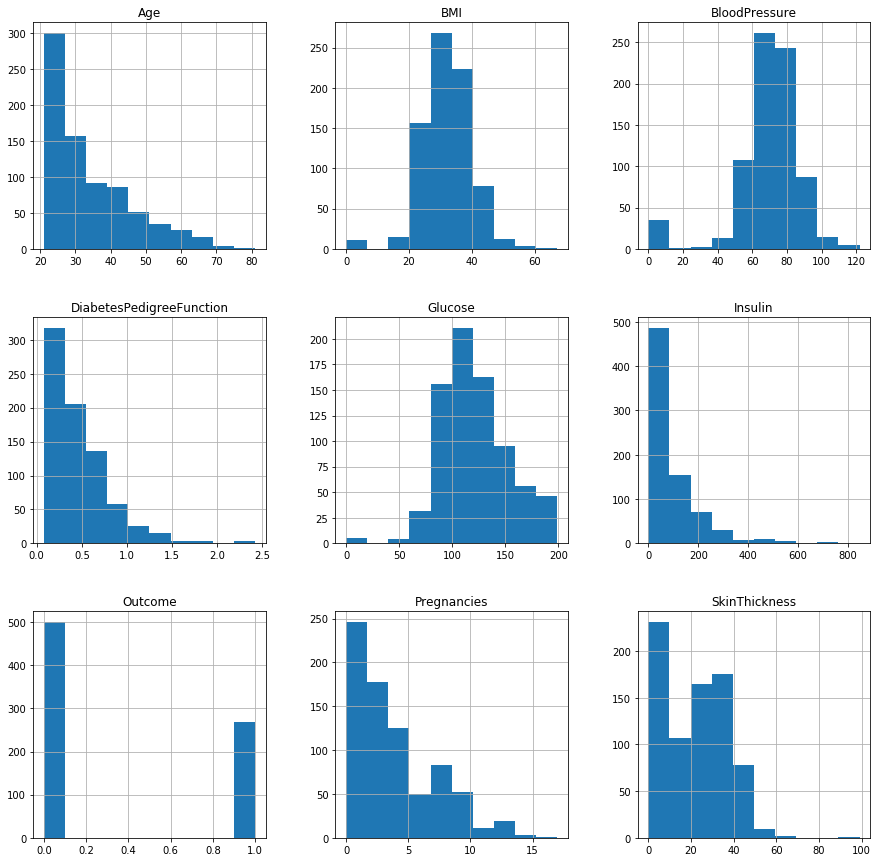

In [ ]:
p = df.hist(figsize = (15,15))

In [ ]:
#df_copy = pd.read_csv("diabetes_ntcc.csv",index_col=0)
#df_copy

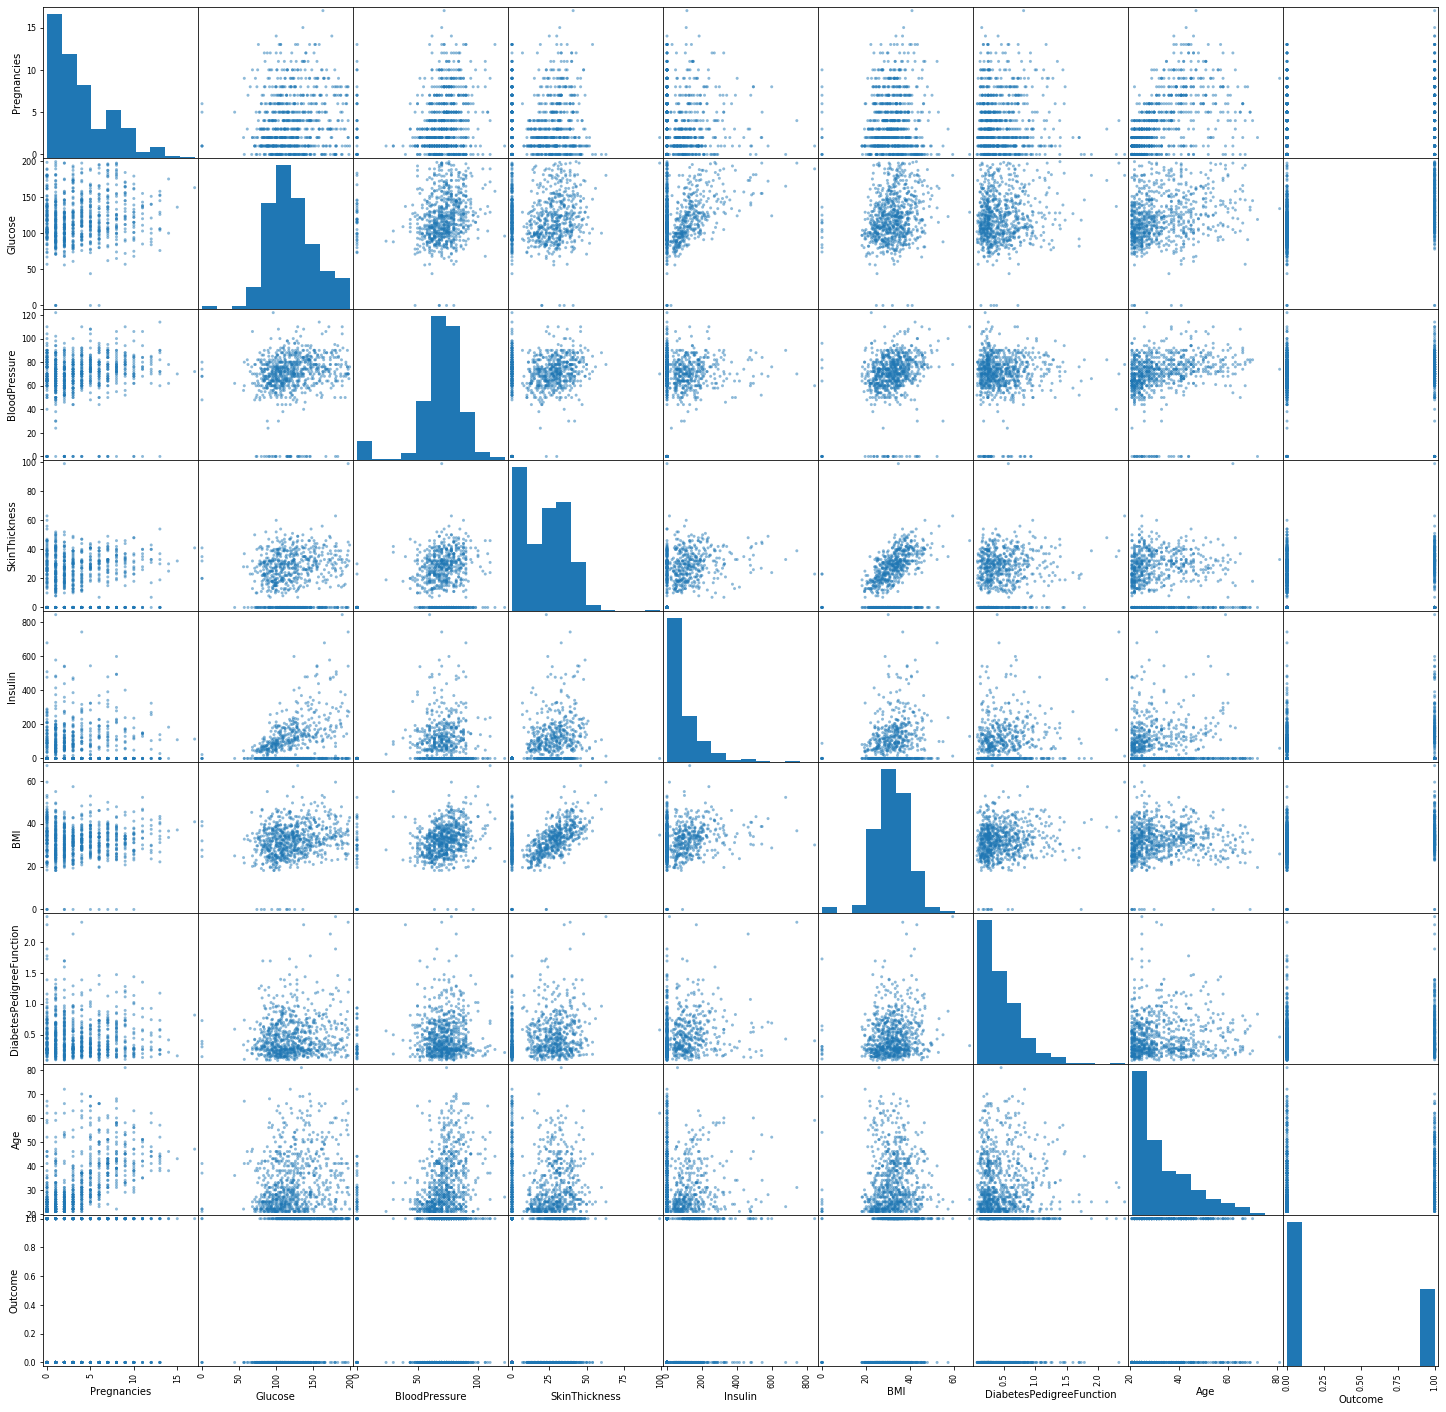

In [ ]:
p=scatter_matrix(df,figsize=(25, 25))

<h1>DATA DISTRIBUTION AFTER CLEANING DATA</h1> 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001121B048>,
      dtype=object)

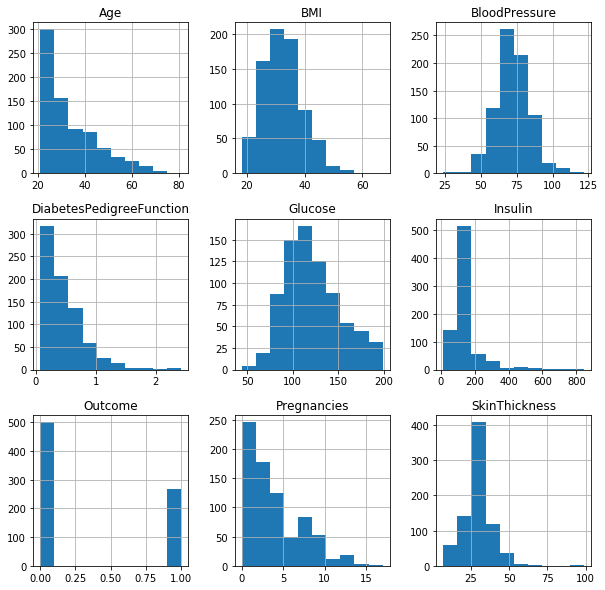

In [ ]:
df_copy.hist(figsize = (10,10))

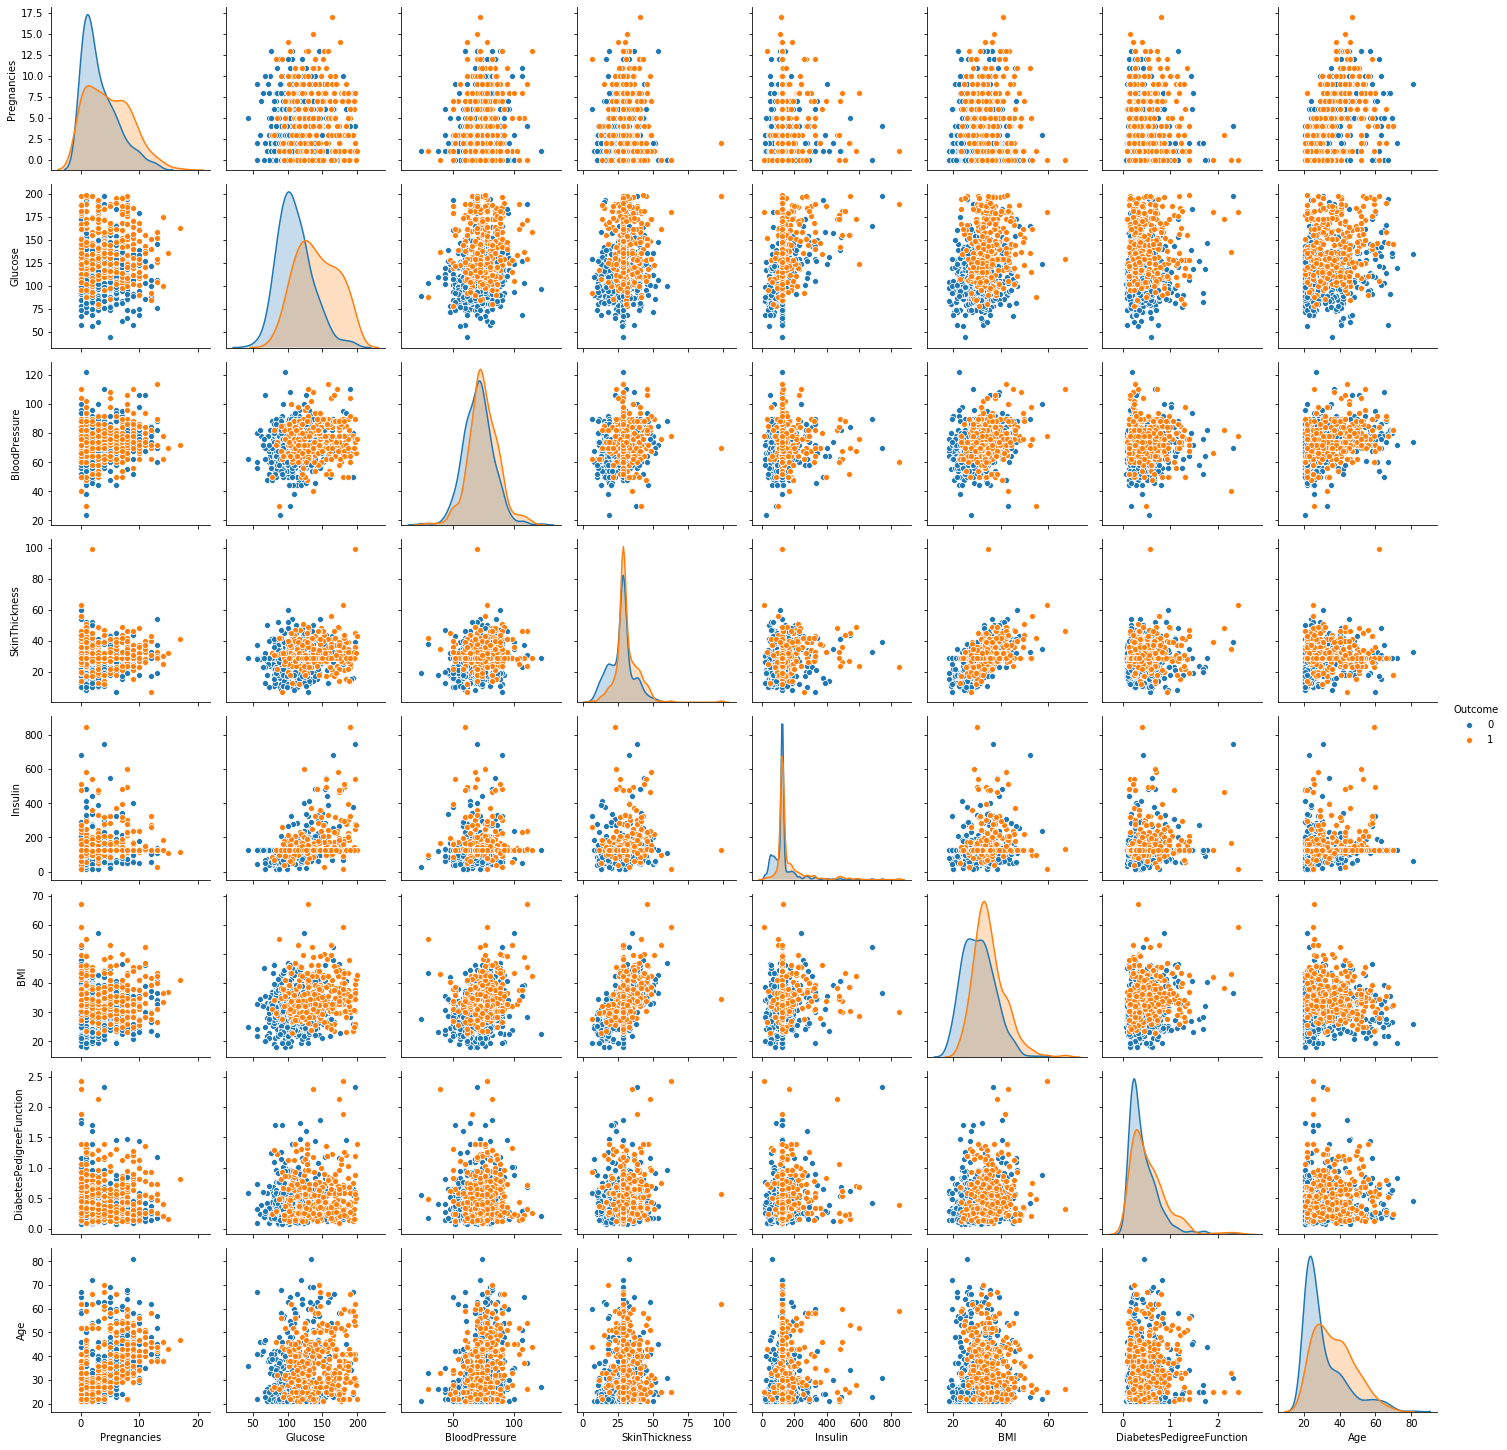

In [ ]:
p = sns.pairplot(df_copy, hue = 'Outcome')    

### SCALING THE DATA 

In [ ]:
df_new = df_copy
for col in {'Insulin','BloodPressure','BMI','SkinThickness','Glucose','Age','Pregnancies',
            'DiabetesPedigreeFunction'}:   
        df_new[col] = ( df_copy[col] - df_copy[col].mean() )/ df_copy[col].std()

<h1> MODEL TRAINING </h1>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_copy.drop(columns='Outcome',inplace=False)
y = df_copy['Outcome']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
for i in range(1,len(test_scores)):
    if(test_scores[i] == max(test_scores)):
        print("test_score:",test_scores[i])
        print("\ntrain_score",train_scores[i])


test_score: 0.78515625

train_score 0.78125


In [ ]:
from sklearn.linear_model import LogisticRegression

### under sampling 

In [ ]:
X = df_copy.drop(columns='Outcome',inplace=False)
y = df_copy['Outcome']
# 0 indeces
a = y[y==0].index.tolist()[:268]
# 1 indeces
b = y[y==1].index.tolist()
# 0 and 1 indexes are merged
a+=b
#under sampling 50 - 50 
x1=X.loc[a]
y1=y.loc[a]

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=1)


In [ ]:
log = LogisticRegression()
log_params=[{'penalty':['l1','l2'],'C':[0.1,0.01,0.001,1],'solver':['liblinear'],'max_iter':[100]}]  

In [ ]:
grid_log = GridSearchCV(LogisticRegression(),log_params)
grid_log.fit(x1,y1)
print(grid_log.best_estimator_)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
from sklearn.model_selection import GridSearchCV
knn_params = {'n_neighbors':list(range(1,100)),'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_knn = GridSearchCV(KNeighborsClassifier(),knn_params)
grid_knn.fit(x1,y1)
print(grid_knn.best_estimator_)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')


In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
log = LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
log.fit(x1,y1)
pred_log = log.predict(X_test)
print(classification_report(y_test,pred_log))
print(accuracy_score(y_test,pred_log)*100)
print('log testing score : ',100*log.score(X_test,y_test))
print('log training score : ',100*log.score(x1,y1))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       164
           1       0.64      0.80      0.71        92

    accuracy                           0.77       256
   macro avg       0.75      0.77      0.76       256
weighted avg       0.79      0.77      0.77       256

76.5625
log testing score :  76.5625
log training score :  73.88059701492537


In [ ]:
knn =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')
knn.fit(x1,y1)
pred=knn.predict(X_test)
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred)*100)
print('KNN testing score : ',100*knn.score(X_test,y_test))
print('KNN training score : ',100*knn.score(x1,y1))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       164
           1       0.76      0.71      0.73        92

    accuracy                           0.82       256
   macro avg       0.80      0.79      0.80       256
weighted avg       0.81      0.82      0.81       256

81.640625
KNN testing score :  81.640625
KNN training score :  77.67295597484278


In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
train_size,train_score,test_score = learning_curve(log,X,y,scoring='accuracy',
                                                   train_sizes=[100,200,400,600],cv=5) 
train_mean =np.mean(train_score,axis =1)
train_std = np.std(train_score,axis =1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

In [ ]:
plt.plot(train_size,train_mean,'o-',color='red',label="training_score")
plt.plot(train_size,test_mean,'o-',color='blue',label='validation_score')
plt.xlabel('training size')
plt.ylabel('Score')
plt.title('LOG learning curve')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
train_size,train_score,test_score = learning_curve(knn,X,y,scoring='accuracy',
                                                   train_sizes=[100,200,400,600],cv=5) 
train_mean =np.mean(train_score,axis =1)
train_std = np.std(train_score,axis =1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

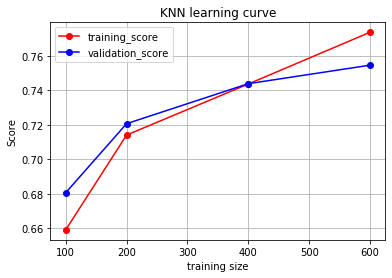

In [ ]:
plt.plot(train_size,train_mean,'o-',color='red',label="training_score")
plt.plot(train_size,test_mean,'o-',color='blue',label='validation_score')
plt.xlabel('training size')
plt.ylabel('Score')
plt.title('KNN learning curve')
plt.grid(True)
plt.legend()

plt.show()

In [ ]:
"""
print('Training scores: \n\n',train_score)
print('\n','-'*70)
print('\ntest scores :\n\n',test_score
"""

"\nprint('Training scores: \n\n',train_score)\nprint('\n','-'*70)\nprint('\ntest scores :\n\n',test_score\n"

In [ ]:
 from sklearn.metrics import confusion_matrix 
 from sklearn import metrics    

Text(0.5, 15.0, 'Predicted')

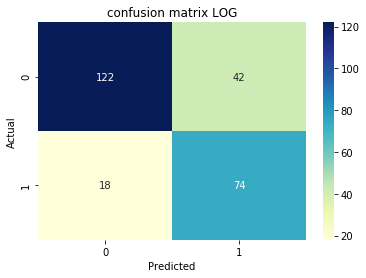

In [ ]:
cnf_mat = metrics.confusion_matrix(y_test,pred_log)
sns.heatmap(pd.DataFrame(cnf_mat),annot=True,cmap='YlGnBu',fmt='g')
plt.title("confusion matrix LOG")
plt.ylabel("Actual")
plt.xlabel("Predicted")

Text(0.5, 15.0, 'Predicted')

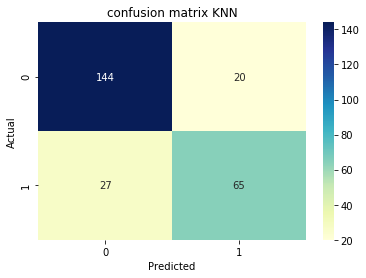

In [ ]:
cnf_mat = metrics.confusion_matrix(y_test,pred)
sns.heatmap(pd.DataFrame(cnf_mat),annot=True,cmap='YlGnBu',fmt='g')
plt.title("confusion matrix KNN")
plt.ylabel("Actual")
plt.xlabel("Predicted")